# Pandas for Aggregation, Combining, and Transforming

#### Aggregations

An aggregation is when we group data in terms of a shared attribute or value. We have read in the happiness data from 2015. Take a moment to look at the first cells and understand the data.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv('./data/world-happiness/2015.csv')
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [2]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


Based on what we learned in the previous cleaning notebook, take a moment and standardize the column headers.  

In [3]:
def format_cols(string):
    return string.lower().replace('(',"").replace(')','').replace(' ', '_')

happiness2015.columns = [format_cols(col) for col in happiness2015.columns]

#### Calculate the mean happiness by region

1. Create an empty dictionary to store the results.
2. Use the ```Series.unique()``` method to create an array of unique values for the region column.
3. Use a for loop to iterate over the unique region values from the region column.
4. Assign the rows belonging to the current region to a variable named region_group.
5. Use the ```Series.mean()``` method to calculate the mean happiness score for region_group.
6. Print out the dictionary with the mean values per region

In [4]:
mean_happiness = {}
regions = happiness2015['region'].unique()
for r in regions:
    region_group = happiness2015[happiness2015['region'] == r]
    region_mean = region_group['happiness_score'].mean()
    mean_happiness[r] = region_mean

In [5]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

#### Using groupby

We can do the whole process above with the ```.groupby()``` method.

1. Use the df.groupby() method to group by the region. Assign the result to grouped.
2. Calcualte the mean of the grouped object and print out the happiness_score per region.

In [6]:
grouped = happiness2015.groupby('region')
grouped['happiness_rank'].mean()

region
Australia and New Zealand            9.500000
Central and Eastern Europe          79.000000
Eastern Asia                        64.500000
Latin America and Caribbean         46.909091
Middle East and Northern Africa     77.600000
North America                       10.000000
Southeastern Asia                   81.222222
Southern Asia                      113.142857
Sub-Saharan Africa                 127.900000
Western Europe                      29.523810
Name: happiness_rank, dtype: float64

Try printing out the mean of the whole grouped object. Notice how mean is acting on the grouped columns.

In [7]:
grouped.mean().head(2)

,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
region,,,,,,,,,,
Australia and New Zealand,9.5,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.0,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400


#### Aggregating from a group

1. Group the happiness dataframe by region
2. Slice out the happiness scores from the grouped object
3. Use the ```.agg()``` method and pass a list of arguments to return the mean, min, and max. Hint use np.mean
4. Print out the resulting dataframe

In [8]:
import numpy as np
grouped = happiness2015.groupby('region')
happy_grouped = grouped['happiness_score']

happy_grouped.agg([np.mean, np.min, np.max])

,mean,amin,amax
region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253
Sub-Saharan Africa,4.202800,2.839,5.477


Plot your results using what you've learned from matplotlib. We've imported ```matplotlib.pyplot``` for you as plt. Hint use ```kind='barh'```

In [9]:
import matplotlib.pyplot as plt 

#Your code here
happiness2015.groupby('region')['happiness_score'].mean().plot(kind='barh', title='Mean Happiness Score by Region')

#### Group by multiple elements

1. Calcualte the minimum, maximum, and mean family and happiness scores for each region.
2. Print out the aggregation.
    - How have the column headers changed?
3. Plot the table.

In [10]:
happy_family_stats = happiness2015.groupby('region')['happiness_score', 'family'].agg([np.min, np.max, np.mean])
happy_family_stats

happiness_score                    family  \
                                           amin   amax      mean     amin   
region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

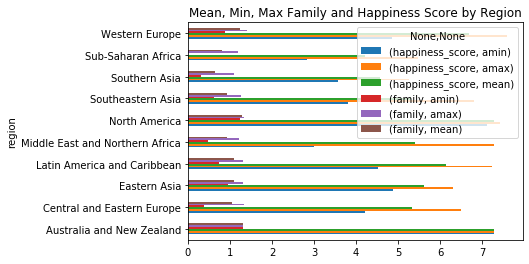

In [37]:
happy_family_stats.plot(kind='barh', title='Mean, Min, Max Family and Happiness Score by Region')

# Data Combining

We've worked with cleaning and grouping a single dataframe. Often we will need to combine data from various sources. In order to do this we will use the ```pd.concat()```, and ```pd.merge()``` methods. 

1. We have imported each of the world happiness data for the years 2015, 2016, 2017.
2. Add a 'year' column to each of the dataframes
3. Clean and standardize each of their respective column headers.
    - Does our original cleaning function work on the 2017 data? Inspect to be sure.

In [11]:
happiness2015 = pd.read_csv('./data/world-happiness/2015.csv')
happiness2016 = pd.read_csv('./data/world-happiness/2016.csv')
happiness2017 = pd.read_csv('./data/world-happiness/2017.csv')

happiness2015['year'] = 2015
happiness2016['year'] = 2016
happiness2017['year'] = 2017

happiness2015.columns = [format_cols(col) for col in happiness2015.columns]
happiness2016.columns = [format_cols(col) for col in happiness2016.columns]

def format_col_2017(string):
    return string.lower().replace('(',"").replace(')','').replace(' ', '_').replace('.', '_')

happiness2017.columns = [format_col_2017(col) for col in happiness2017.columns]

#### Concatenation

1. Slice the columns 'country, happiness_score, year' for each of the three dataframes. Assign the first 3 rows from each dataframe to and indivdual variable.
2. Use ```pd.concat()``` to concatente the three dataframes together.
    - Try with axis = 0
    - Try with axis = 1
    - Whats the difference? Which makes sense for these three dataframes?


In [12]:
head_2015 = happiness2015[['country','happiness_score', 'year']].head(3)
head_2016 = happiness2016[['country','happiness_score', 'year']].head(3)
head_2017 = happiness2017[['country','happiness_score', 'year']].head(3)

pd.concat([head_2015, head_2016, head_2017], axis = 0)

,country,happiness_score,year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
0,Norway,7.537,2017
1,Denmark,7.522,2017
2,Iceland,7.504,2017


In [13]:
pd.concat([head_2015, head_2016, head_2017], axis = 1)

,country,happiness_score,year,country,happiness_score,year,country,happiness_score,year
0,Switzerland,7.587,2015,Denmark,7.526,2016,Norway,7.537,2017
1,Iceland,7.561,2015,Switzerland,7.509,2016,Denmark,7.522,2017
2,Denmark,7.527,2015,Iceland,7.501,2016,Iceland,7.504,2017


#### Using Merge

1. Do the same as above using the ```pd.merge()``` function as if we were doing a concat with axis = 1 (column join) and use a left join
2. Use the country as the key in the merge
3. Print out the result.
    - How is the merge function different than the concat function?

In [14]:
three_2015 = happiness2015[['country','happiness_score', 'year']].iloc[:3]
three_2016 = happiness2016[['country','happiness_score', 'year']].iloc[:3]
three_2017 = happiness2017[['country','happiness_score', 'year']].iloc[:3]

merge_2015_16 = pd.merge(left = three_2015, right = three_2016, on = "country", how='left')
merge_all = pd.merge(left=merge_2015_16, right=three_2017, on='country', how='left')
merge_all

,country,happiness_score_x,year_x,happiness_score_y,year_y,happiness_score,year
0,Switzerland,7.587,2015,7.509,2016,NaN,NaN
1,Iceland,7.561,2015,7.501,2016,7.504,2017.0
2,Denmark,7.527,2015,7.526,2016,7.522,2017.0


1. Look up ```pd.merge()``` in the pandas documentation on how the suffixes paramter works.
2. Repeate the above merge adding suffixes for the years 2015, and 2016 in the join

In [15]:
merge_2015_16 = pd.merge(left = three_2015, right = three_2016, on = "country", how='left', suffixes=('_2015', '_2016'))
merge_all = pd.merge(left=merge_2015_16, right=three_2017, on='country', how='left')
merge_all

,country,happiness_score_2015,year_2015,happiness_score_2016,year_2016,happiness_score,year
0,Switzerland,7.587,2015,7.509,2016,NaN,NaN
1,Iceland,7.561,2015,7.501,2016,7.504,2017.0
2,Denmark,7.527,2015,7.526,2016,7.522,2017.0



1. Use either ```pd.concat()``` or ```pd.merge()``` and create a combined dataframe with all three years of data.
    - Do you need to drop/modify columns in order to join the dataframes completely?
    - What happens when you join and a column isn't in a dataframe?
2. Use what you learned in the aggregation section and plot the mean happiness score per year for spain, your country, and one other of your choice.

/Users/ns/anaconda3/envs/bk_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


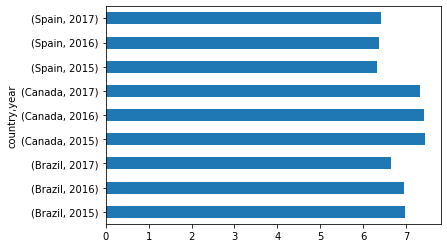

In [51]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0)
country_slice = combined[(combined['country'] == 'Canada') | 
                         (combined['country'] == 'Spain') |
                        (combined['country'] == 'Brazil')]

country_slice.groupby(['country', 'year']).mean()['happiness_score'].plot(kind='barh')

# Data Transforms

This section will look at transforming data in different ways. Previously we learned the ```.map()``` and the ```.apply()``` methods.

1. Create a function that returns 'high' if a value is >x and low otherwise.
    - Hint you should be able to change the threshold x for high and low.
2. Use the ```.map()``` and ```.apply()``` functions to transform the numerical values of the economy_gdp_per_capita column to categorical values.
    - Do the methods return the same thing for each transofmred column?
3. Do the same using the ```.applymap()``` function. Is there a difference? 
    - Look in the documentation to see if ```.apply()``` and ```.applymap()``` operate the same.
4. Make a new dataframe and apply your function to the columns
```['economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity']```
    - Is this tranformation reversible?
    - When might we want to use this kind of transform?
    - Hint: you might need to use a lambda function


In [57]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
happiness2015['economy_gdp_per_capita'].apply(label, x = 0.8)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: economy_gdp_per_capita, Length: 158, dtype: object

In [63]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
#economy_apply = happiness2015['economy_gdp_per_capita'].apply(label)
factors = ['economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity']
happiness2015[factors].applymap(lambda func : label(func, x=0.8))

,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,High,High,High,Low,Low,Low
1,High,High,High,Low,Low,Low
2,High,High,High,Low,Low,Low
3,High,High,High,Low,Low,Low
4,High,High,High,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low




1. Create a function that converts each of the factor columns into a percentage
    - I.e. series column value / happiness_score
2. Use ```.apply()``` or ```.applymap()``` to generate a dataframe with the percetnage contribution of each factor.

In [66]:
factors = ['economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity']

def percentages(col):
    score = happiness2015['happiness_score']
    div = col/score
    return div*100

happiness2015[factors].apply(percentages)

,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170
...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706


1. Create two lists of column headers. First for the main columns ```['country', 'region', 'happiness_rank', 'happiness_score']``` and second with the factors columns from above.
2. Use the ```pd.melt()``` function to create a new dataframe. Use the main columns as your column headers (id_vars). The columns in factors should be transformed into rows.
3. Inspect the new dataframe. What does the 'value' column represent?
4. Use the new value column to calcualte the percentage per row.
    - i.e. value divided by happiness score.

In [69]:
main_cols = ['country', 'region', 'happiness_rank', 'happiness_score']
factors = ['economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['percentage'] = round((melt['value']/melt['happiness_score'])*100, 2)
melt

,country,region,happiness_rank,happiness_score,variable,value,percentage
0,Switzerland,Western Europe,1,7.587,economy_gdp_per_capita,1.39651,18.41
1,Iceland,Western Europe,2,7.561,economy_gdp_per_capita,1.30232,17.22
2,Denmark,Western Europe,3,7.527,economy_gdp_per_capita,1.32548,17.61
3,Norway,Western Europe,4,7.522,economy_gdp_per_capita,1.45900,19.40
4,Canada,North America,5,7.427,economy_gdp_per_capita,1.32629,17.86
...,...,...,...,...,...,...,...
943,Rwanda,Sub-Saharan Africa,154,3.465,generosity,0.22628,6.53
944,Benin,Sub-Saharan Africa,155,3.340,generosity,0.18260,5.47
945,Syria,Middle East and Northern Africa,156,3.006,generosity,0.47179,15.69
946,Burundi,Sub-Saharan Africa,157,2.905,generosity,0.19727,6.79


#### Challenge

1. Use ```df.pivot_table()``` to create a pie chart that displays the various contributions of the factors to the happiness score.
    - Hint you will need to use the dataframe you created in the step above using ```.melt()```.

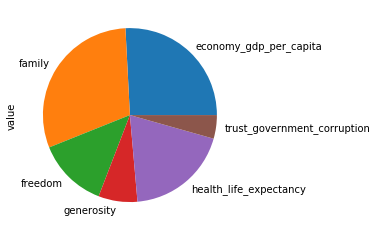

In [70]:
pv_melt = melt.pivot_table(index = 'variable', values = 'value')
pv_melt.plot(kind = 'pie', y = 'value', legend = False)
plt.show()